Load and Understand the Data 

In [1]:
import pandas as pd

# Load the dataset
file_path = 'googleplaystore.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values and data types
print(df.info())

# Summary statistics
print(df.describe(include='all'))


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

Data Cleaning

In [2]:
# Handling missing values
df = df.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres'])

# Convert data types
df['Reviews'] = df['Reviews'].astype(int)
df['Size'] = df['Size'].replace('Varies with device', '0')
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3').astype(float)
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB
None


Exploratory Data Analysis (EDA)

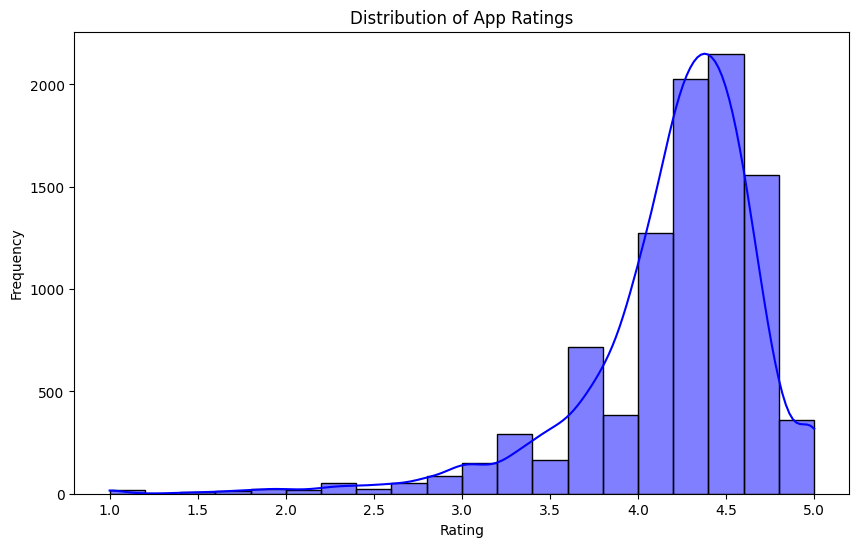

In [3]:
# Ratings Distribution: Histogram

import seaborn as sns
import matplotlib.pyplot as plt

# Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
# plt.gca().set_facecolor('darkgrey')  # Changing the background color
plt.show()


Reviews vs. Installs, Size vs. Installs, Price vs. Ratings: Scatter Plot Matrix


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\L

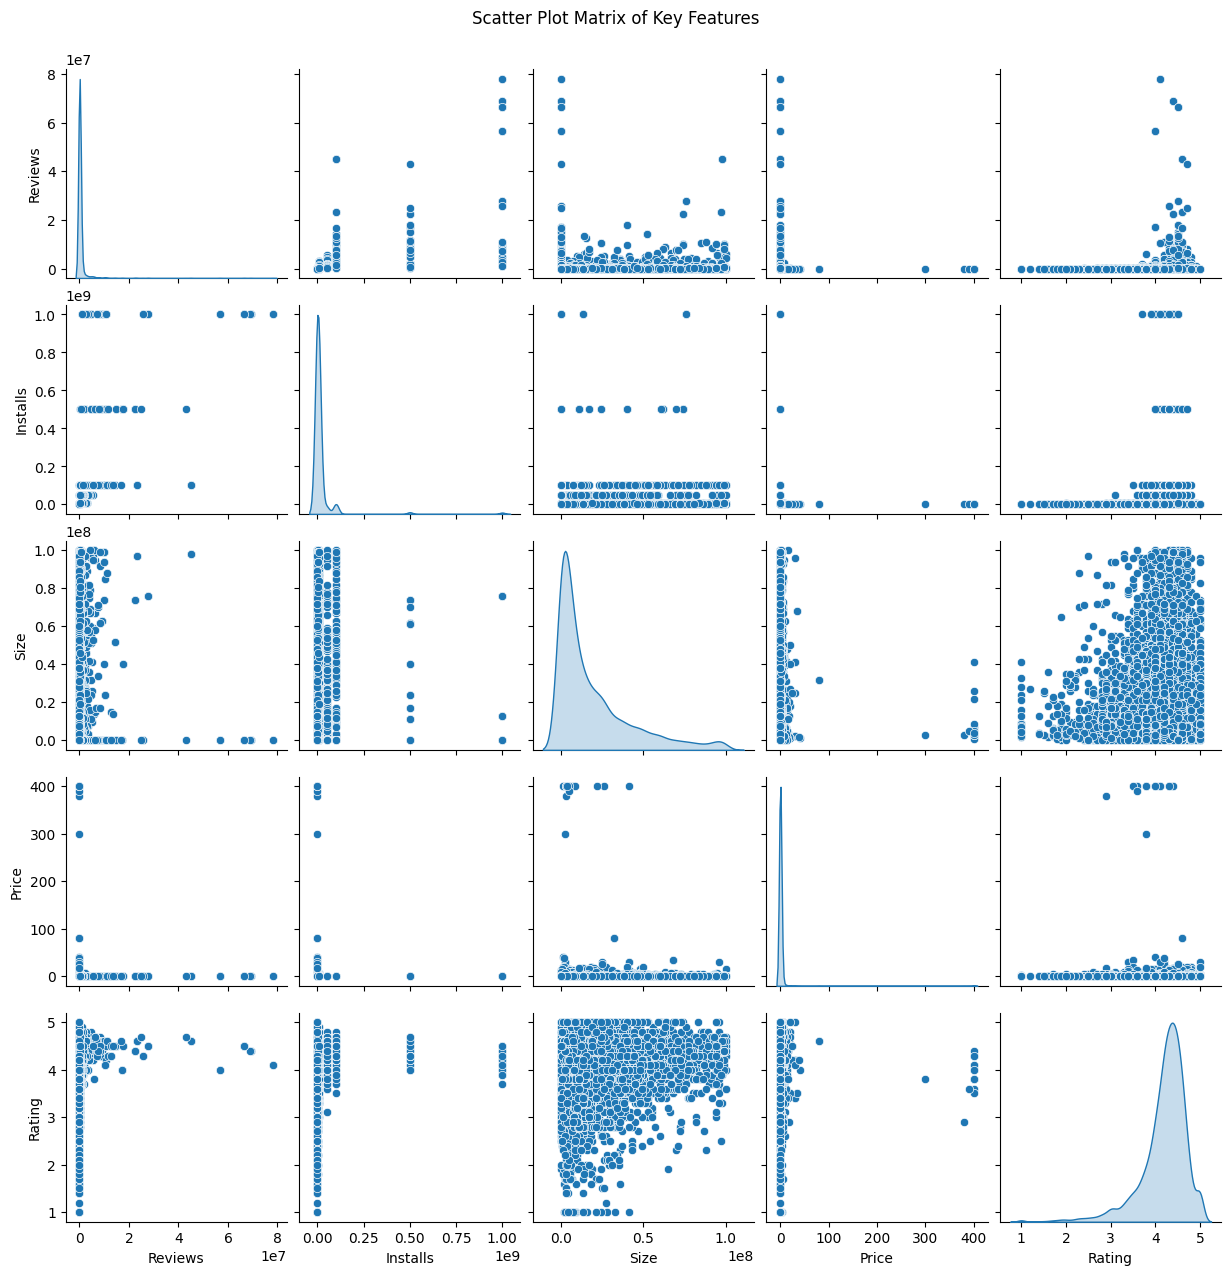

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot Matrix
sns.pairplot(df[['Reviews', 'Installs', 'Size', 'Price', 'Rating']], diag_kind='kde', palette='coolwarm')
plt.suptitle('Scatter Plot Matrix of Key Features', y=1.02)
plt.show()


Genre Popularity with Ratings and Installs: Scatter Plot


In [5]:
import plotly.express as px

# 2D Scatter Plot
fig = px.scatter(df, x='Genres', y='Rating', size='Installs', color='Genres', 
                 title='Genre Popularity with Ratings and Installs')
fig.show()


Top Downloaded Apps by Category: Interactive Bar Chart


In [6]:
import plotly.express as px

# Top Downloaded Apps by Category
top_downloads = df.groupby('Category').agg({'Installs': 'sum'}).reset_index().sort_values(by='Installs', ascending=False)

fig = px.bar(top_downloads, x='Category', y='Installs', color='Category', title='Top Downloaded Apps by Category')
fig.show()


Evolution of Ratings and Updates: Time Series with Annotations


In [7]:
import plotly.graph_objects as go

# Group by date and calculate mean ratings
rating_evolution = df.groupby('Last Updated').agg({'Rating': 'mean'}).reset_index()

# Time Series with Annotations
fig = go.Figure()

fig.add_trace(go.Scatter(x=rating_evolution['Last Updated'], y=rating_evolution['Rating'], mode='lines+markers'))

# Add Annotations
annotations = [dict(x=row['Last Updated'], y=row['Rating'], text=f"{row['Rating']:.2f}", showarrow=True, arrowhead=2) 
               for i, row in rating_evolution.iterrows()]
fig.update_layout(annotations=annotations)



fig.update_layout(title='Evolution of Ratings Over Time', xaxis_title='Date', yaxis_title='Average Rating')
fig.show()


Content Rating vs. Installs/Ratings: Box Plot with Facets


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6048\1006428099.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




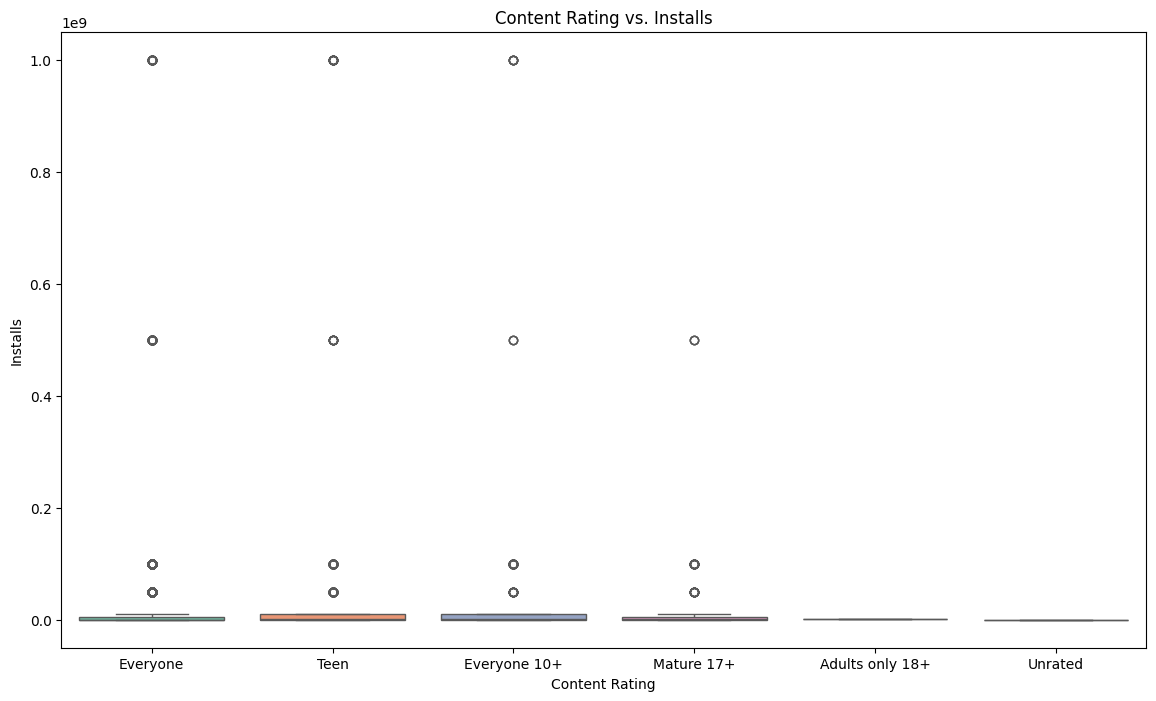

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot with Facets
plt.figure(figsize=(14, 8))
sns.boxplot(x='Content Rating', y='Installs', data=df, palette='Set2')
plt.title('Content Rating vs. Installs')
plt.xlabel('Content Rating')
plt.ylabel('Installs')
plt.show()


App Size vs. Installs with Color-Coded Category: Bubble Chart


In [9]:
import plotly.express as px

# Bubble Chart
fig = px.scatter(df, x='Size', y='Installs', size='Rating', color='Category', 
                 title='App Size vs. Installs with Color-Coded Category')
# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')  # Making the plot background transparent

fig.show()



Average Ratings/Installs/Revenue by Category: Bar Chart


In [10]:
import plotly.express as px

# Average Ratings/Installs/Revenue by Category
category_stats = df.groupby('Category').agg({'Rating': 'mean', 'Installs': 'mean', 'Price': 'sum'}).reset_index()

fig = px.bar(category_stats, x='Category', y=['Rating', 'Installs', 'Price'], barmode='group', 
             title='Average Ratings, Installs, and Revenue by Category')

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')  # Making the plot background transparent
fig.show()


App Size vs. Installs: Scatter Plot


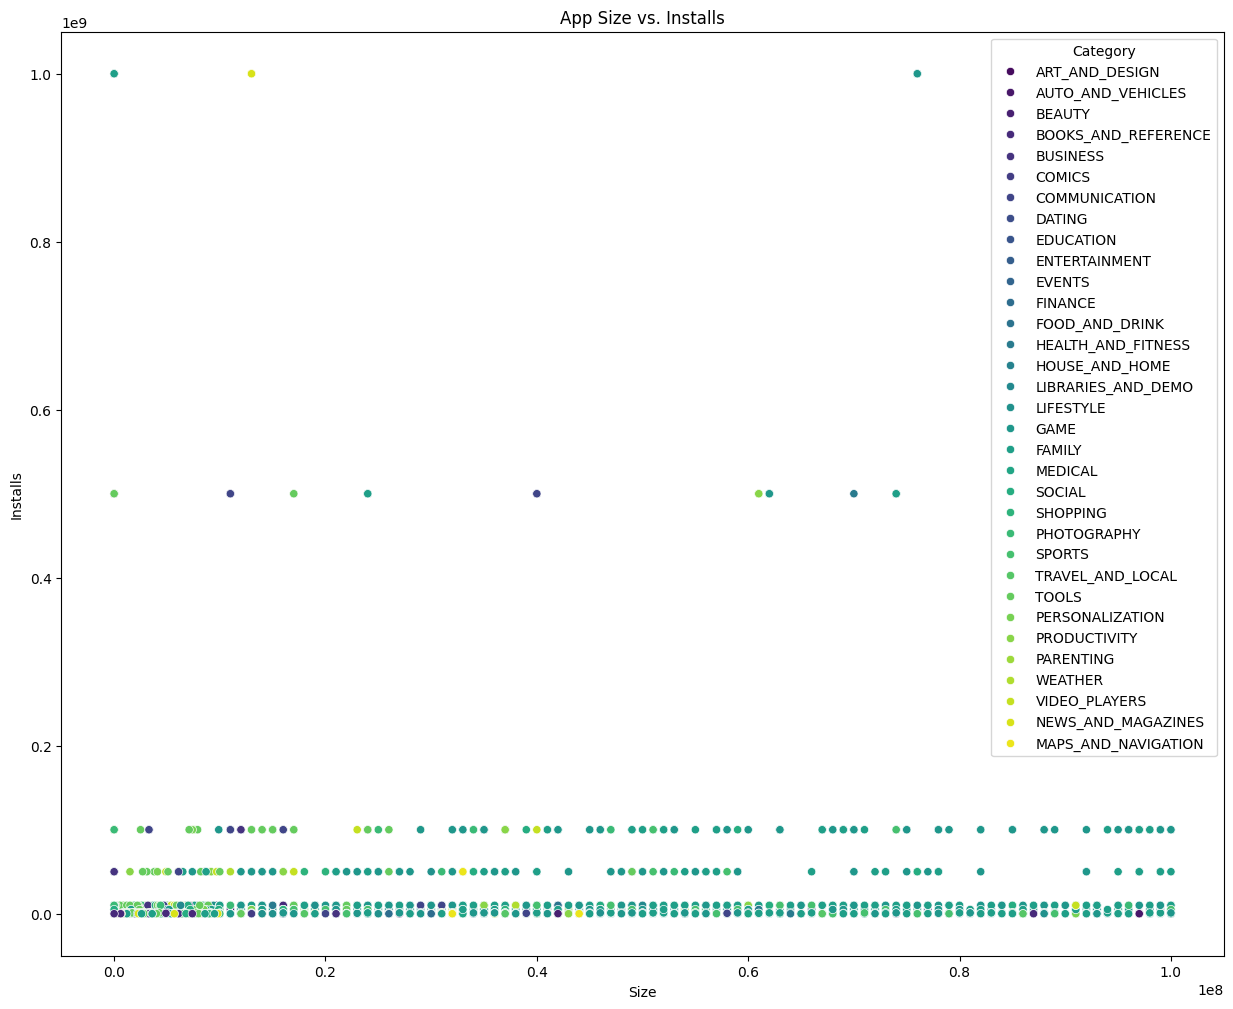

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(15, 12))
sns.scatterplot(x='Size', y='Installs', data=df, hue='Category', palette='viridis')
plt.title('App Size vs. Installs')
plt.xlabel('Size')
plt.ylabel('Installs')
plt.show()


Top Downloaded Apps by Category: Bar Chart


In [12]:
import plotly.express as px

# Top Downloaded Apps by Category
top_downloads = df.groupby('Category').agg({'Installs': 'sum'}).reset_index().sort_values(by='Installs', ascending=False)

fig = px.bar(top_downloads, x='Category', y='Installs', color='Category', title='Top Downloaded Apps by Category')
# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')  # Making the plot background transparent

fig.show()


In [13]:
import plotly.express as px

# Number of Apps per Category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

fig = px.bar(category_counts, x='Category', y='Count', title='Number of Apps per Category', color='Category')
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')  # Making the plot background transparent
fig.show()


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.00,4.3,4.50,5.000000e+00
Reviews,9366.0,5.140498e+05,3.144042e+06,1.0,186.25,5930.5,81532.75,7.815831e+07
Size,9366.0,1.894505e+07,2.301372e+07,0.0,2400000.00,9500000.0,27000000.00,1.000000e+08
Installs,9366.0,1.789744e+07,9.123822e+07,1.0,10000.00,500000.0,5000000.00,1.000000e+09
Price,9366.0,9.609278e-01,1.581658e+01,0.0,0.00,0.0,0.00,4.000000e+02


In [15]:
df.memory_usage()

Index             74928
App               74928
Category          74928
Rating            74928
Reviews           37464
Size              74928
Installs          37464
Type              74928
Price             74928
Content Rating    74928
Genres            74928
Last Updated      74928
Current Ver       74928
Android Ver       74928
dtype: int64